## Import Modules

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [6]:
bike_06 = pd.read_csv('201806-fordgobike-tripdata.csv')

In [7]:
bike_06.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59088,2018-06-30 23:32:44.6590,2018-07-01 15:57:33.3160,76.0,McCoppin St at Valencia St,37.771662,-122.422423,95.0,Sanchez St at 15th St,37.766219,-122.431060,2100,Subscriber,1975.0,Male,Yes
1,60358,2018-06-30 21:48:19.5570,2018-07-01 14:34:18.1000,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,653,Customer,NaN,NaN,No
2,63654,2018-06-30 20:26:53.0310,2018-07-01 14:07:47.2320,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,50.0,2nd St at Townsend St,37.780526,-122.390288,3235,Subscriber,1962.0,Female,No
3,50508,2018-06-30 20:29:59.8130,2018-07-01 10:31:48.2500,58.0,Market St at 10th St,37.776619,-122.417385,88.0,11th St at Bryant St,37.770030,-122.411726,3675,Subscriber,1992.0,Male,No
4,51697,2018-06-30 18:24:56.6960,2018-07-01 08:46:33.7390,196.0,Grand Ave at Perkins St,37.808894,-122.256460,272.0,Woolsey St at Sacramento St,37.850578,-122.278175,3232,Customer,1989.0,Female,No


In [8]:
bike_06.user_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [9]:
bike_06.duration_sec.max()*1.0/60/24

59.22083333333333

In [10]:
bike_06.duration_sec.describe()

count    195968.000000
mean        907.748439
std        2642.666562
min          61.000000
25%         351.000000
50%         564.000000
75%         896.000000
max       85278.000000
Name: duration_sec, dtype: float64

#### 1. Make A Bar Graph of the Count of Rides for Each Day of May 2018.

In [11]:
bike_06['start_time_datetime'] = pd.to_datetime(bike_06['start_time'])
bike_06['start_time_day']=pd.to_datetime(bike_06['start_time']).dt.day

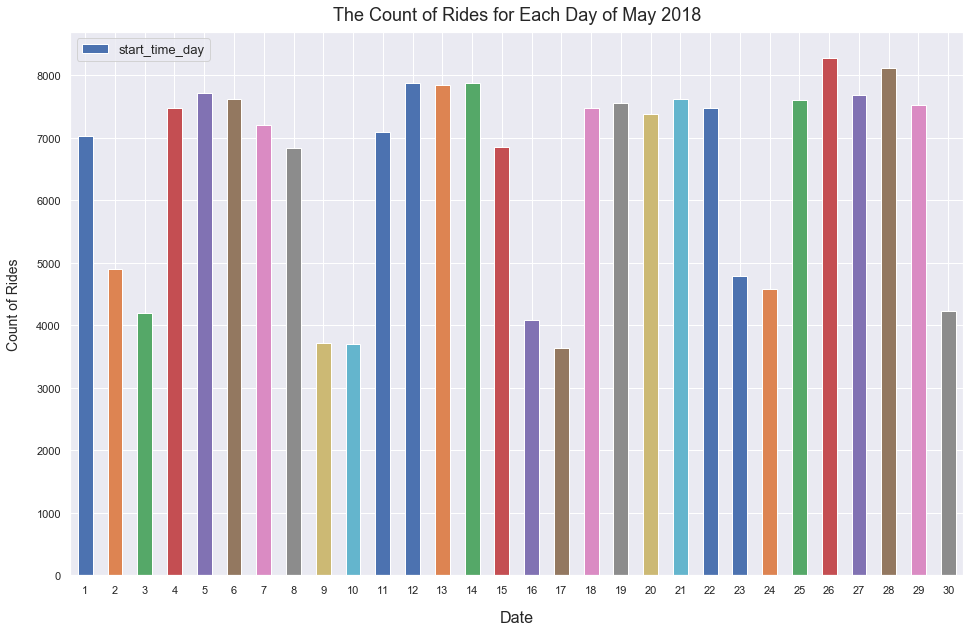

In [14]:
bike_06.groupby('start_time_day')['start_time_day'].count().plot(kind='bar',figsize=(16,10))
plt.title('The Count of Rides for Each Day of May 2018', fontsize=18, y=1.01)
plt.xlabel('Date', fontsize=16,labelpad=15)
plt.xticks(rotation=0)
plt.ylabel('Count of Rides', fontsize=14, labelpad=15)
plt.legend(fontsize=13);

#### 2. Plot Average Count of Rides Per Day of Week

In [17]:
bike_06['start_time_day_name'] = bike_06['start_time_datetime'].dt.weekday_name
bike_06['start_time_day_name'] = pd.Categorical(bike_06['start_time_day_name'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

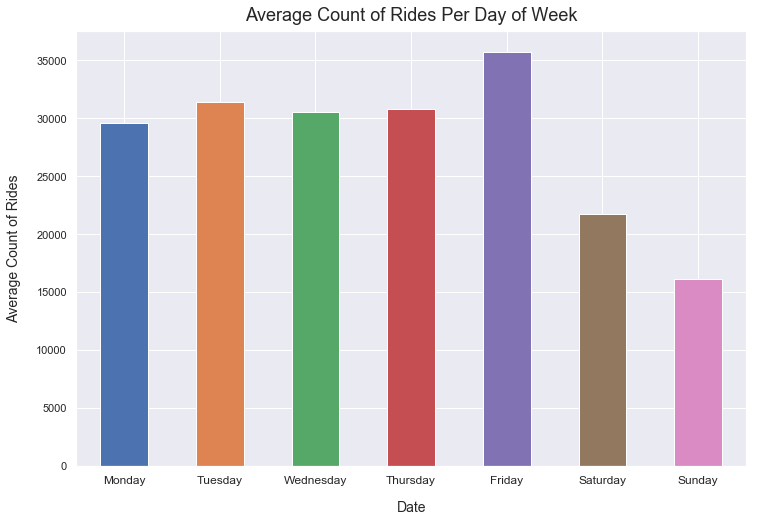

In [19]:
bike_06.groupby('start_time_day_name').count()['duration_sec'].plot(kind='bar',figsize=(12,8))
plt.title('Average Count of Rides Per Day of Week', fontsize=18, y=1.01)
plt.xlabel('Date', fontsize=14,labelpad=15)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel('Average Count of Rides', fontsize=14, labelpad=15);

#### 3. Make a Plot with 2 Lines to Mark the Count of Rides the Past 7 days Versus the Previous 7 days before that

In [39]:
df_lastweek=bike_06[(bike_06['start_time_datetime'] >= datetime.date(2018,6,17)) & (bike_06['start_time_datetime'] <= datetime.date(2018,6,24))]
df_thisweek=bike_06[(bike_06['start_time_datetime'] >= datetime.date(2018,6,24)) & (bike_06['start_time_datetime'] <= datetime.date(2018,7,1))]

In [41]:
df_thisweek.groupby('start_time_day')['start_time_day'].count()

start_time_day
24    4584
25    7596
26    8282
27    7687
28    8120
29    7519
30    4226
Name: start_time_day, dtype: int64

In [42]:
lastweek_series=df_lastweek.groupby('start_time_day')['start_time_day'].count()
thisweek_series=df_thisweek.groupby('start_time_day')['start_time_day'].count()
lastweek_series.index=thisweek_series.index

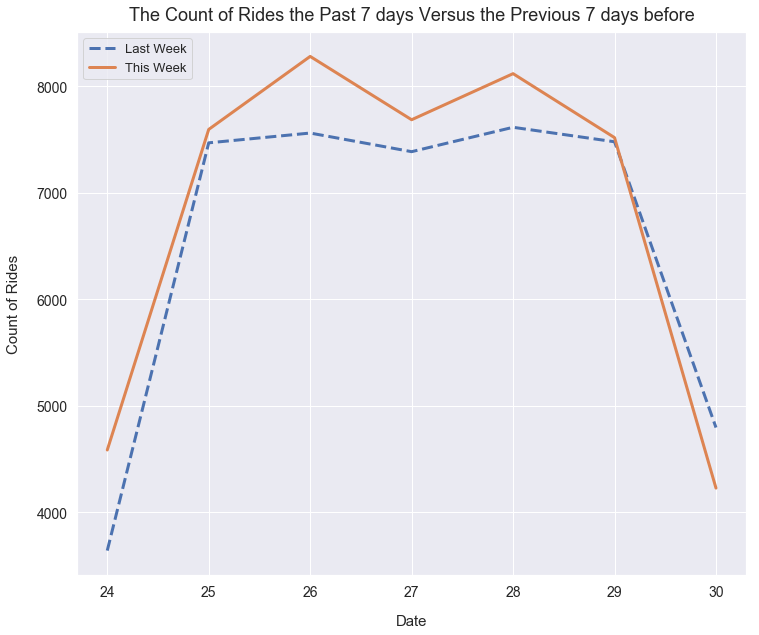

In [43]:
lastweek_series.plot(kind='line',style='--',figsize=(12,10),label='Last Week',linewidth=3)
thisweek_series.plot(kind='line',figsize=(12,10),label='This Week',linewidth=3);
plt.title('The Count of Rides the Past 7 days Versus the Previous 7 days before', fontsize=18, y=1.01)
plt.xlabel('Date', fontsize=15, labelpad=15)
plt.xticks(thisweek_series.index,fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.ylabel('Count of Rides', fontsize=15, labelpad=15)
plt.legend(fontsize=13,loc=2) 

#### 4. Make a Horizontal Bar Plot of Count of Rides from the Top 10 Docks

In [44]:
bike_06.groupby('start_station_name').size().sort_values(ascending=False).head(10)

start_station_name
San Francisco Ferry Building (Harry Bridges Plaza)           4099
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3921
Berry St at 4th St                                           3871
San Francisco Caltrain (Townsend St at 4th St)               3722
The Embarcadero at Sansome St                                3676
Montgomery St BART Station (Market St at 2nd St)             3636
Market St at 10th St                                         3604
Powell St BART Station (Market St at 4th St)                 3257
Steuart St at Market St                                      3070
3rd St at Townsend St                                        2767
dtype: int64

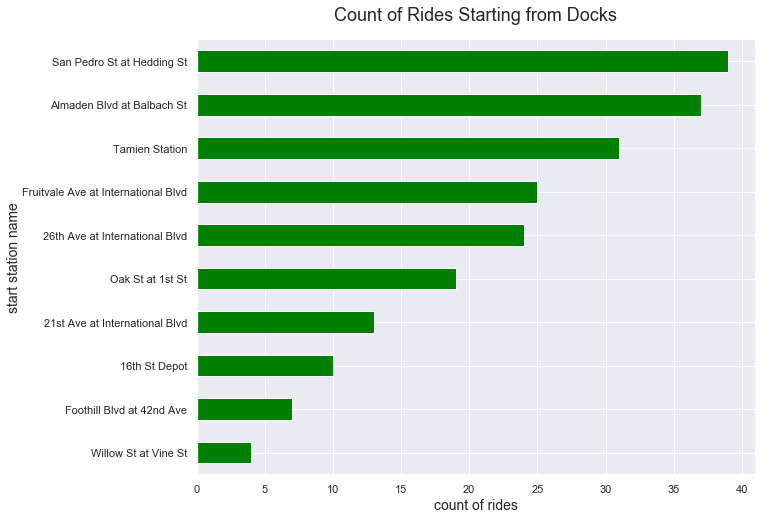

In [45]:
bike_06.groupby('start_station_name').size().sort_values().head(10).plot(kind='barh', color='green', figsize=(10, 8))                                                                          
plt.xlabel("count of rides",fontsize=14)
plt.ylabel("start station name",fontsize=14,labelpad=1.02)
plt.title("Count of Rides Starting from Docks",fontsize=18, y=1.03);